In [2]:
import numpy as np
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import requests as rq
from datetime import datetime
from pandas import Series,DataFrame
from io import StringIO
from __future__ import division
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

sns.set_style('whitegrid')
%matplotlib inline


# Network - Input CSV file

In [6]:
Donald = pd.read_csv('./2016/Donald.csv', encoding='ISO-8859-1', parse_dates = ['timestamp'])
Trump = pd.read_csv('./2016/Trump.csv', encoding='ISO-8859-1', parse_dates = ['timestamp'])
Clinton = pd.read_csv('./2016/Clinton.csv', encoding='ISO-8859-1', parse_dates = ['timestamp'])
Hillary = pd.read_csv('./2016/Hillary.csv', encoding='ISO-8859-1', parse_dates = ['timestamp'])

c:\users\yeshuchuan\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (198) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\users\yeshuchuan\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (180) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
Donald_Trump= [Donald, Trump]
Donald_Trump_total = pd.concat(Donald_Trump)
Donald_Trump_total.head()

,timestamp,id,link,caption,author,network,likes,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199
0,2016-07-25 20:36:00,1617878,http://imgur.com/a/8QHBb,cp 666\n Donald Trump\n HP 666/666\n 18.8 m\n ...,politicalhumor,imgur,-19,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-03 17:07:00,882383,http://imgur.com/PNH3li7,TAKE ME TO YOUR LEADER\n JESUS NOT DONALD TRUM...,dankchristianmemes,imgur,-15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-09-27 20:50:00,2574116,http://imgur.com/a/3zSGZ,ONLY THE\n POOR\n AND ONLY THE\n STUPID\n PAY\...,politicalhumor,imgur,-13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-31 17:17:00,800269,http://imgur.com/uieds24,WHEN GOD SAID LET THERE BE\n LIGHT\n HE HAD TO...,dankchristianmemes,imgur,-13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-05-05 23:08:00,355062,http://imgur.com/BgtxDoF,4:33 PM\n 91%\n Search in\n #Never Trump\n Dan...,NaN,imgur,-12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
Clinton_Hillary= [Clinton, Hillary]
Clinton_Hillary_total = pd.concat(Clinton_Hillary)
Clinton_Hillary_total.head()

,Unnamed: 10,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,...,Unnamed: 97,Unnamed: 98,Unnamed: 99,author,caption,id,likes,link,network,timestamp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,forwardsfromgrandma,"Son killed by\n country, in a\n in a\n war sta...",1742494,-20,http://imgur.com/a/lNHED,imgur,2016-08-01 20:56:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TumblrInAction,1h\n Why end racism when we can just\n end the...,1633557,-16,http://imgur.com/a/FRGrq,imgur,2016-07-27 00:54:00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,forwardsfromgrandma,HILLARY CLINTON SAYS YOU CAN\n KILL A BABY THE...,3017540,-14,http://imgur.com/a/giimL,imgur,2016-10-20 07:34:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4chan,I Liked\n p Message Save\n More\n A Write a co...,3061639,-13,http://imgur.com/a/tPNT6,imgur,2016-10-22 05:10:00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,politicalhumor,This is such a hypocritical thing to be on hil...,3160267,-10,http://imgur.com/a/e6gme,imgur,2016-10-26 02:30:00


# Compare Trump and Hillary likes over different network

Trump likes on network

In [42]:
Donald_Trump_network = sum(Donald_Trump_total.likes)
sum(Donald_Trump_total.likes)

37903307

Clinton likes on network

In [43]:
Clinton_Hillary_network = sum(Clinton_Hillary_total.likes)
sum(Clinton_Hillary_total.likes)

13992404

Compare network usage

In [44]:
Donald_Trump_network = Donald_Trump_total.groupby('network').sum()['likes']
Clinton_Hillary_network = Clinton_Hillary_total.groupby('network').sum()['likes']

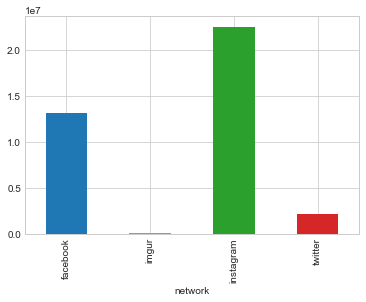

In [45]:
Donald_Trump_network.plot.bar()

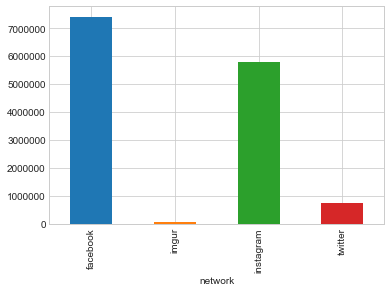

In [46]:
Clinton_Hillary_network.plot.bar()

Find value from Facebook, Imgur, Instagram, Twitter and get who have more more social media 'likes'.

In [13]:
network_data = pd.concat([Donald_Trump_network, Clinton_Hillary_network], axis=1)
network_data.columns=['Trump','Hillary']

In [14]:
network_data.head()

,Trump,Hillary
network,,
facebook,13094828,7411606
imgur,110920,47455
instagram,22494612,5794669
twitter,2202947,738674


The above indicates Trump had more social media 'likes' than Hillary. The most used network is instagram.

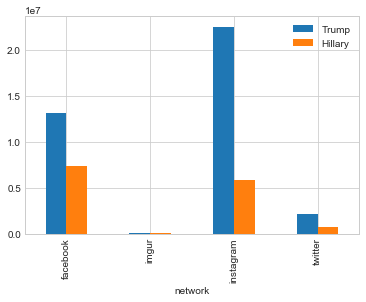

In [15]:
network_data.plot(kind='bar')


The number of social media 'likes' by time in 2016

In [16]:
Clinton_Hillary = pd.concat([Hillary, Clinton], ignore_index=True, join="inner")
Clinton_Hillary = Clinton_Hillary[Clinton_Hillary['timestamp'] > datetime(2016, 1, 1)]
Clinton_Hillary.sort_values (['timestamp'], inplace = True)
Clinton_Hillary = Clinton_Hillary.drop_duplicates(['id'])

In [17]:
Donald_Trump = pd.concat([Donald,Trump], ignore_index=True, join="inner")
Donald_Trump = Donald_Trump[Donald_Trump['timestamp'] > datetime(2016, 1, 1)]
Donald_Trump.sort_values(['timestamp'], inplace = True)
Donald_Trump = Donald_Trump.drop_duplicates(['id'])

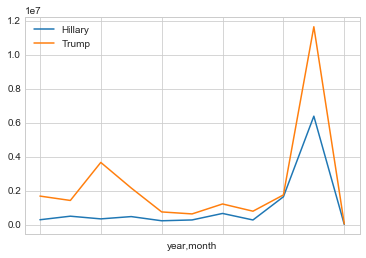

In [18]:
Clinton_Hillary['year'] = pd.DatetimeIndex(Clinton_Hillary['timestamp']).year
Clinton_Hillary['month'] = pd.DatetimeIndex(Clinton_Hillary['timestamp']).month
Clinton_Hillary['day'] = pd.DatetimeIndex(Clinton_Hillary['timestamp']).day
Clinton_Hillary_agg = Clinton_Hillary.groupby([Clinton_Hillary['year'], Clinton_Hillary['month']])['likes'].sum()

Donald_Trump['year'] = pd.DatetimeIndex(Donald_Trump['timestamp']).year
Donald_Trump['month'] = pd.DatetimeIndex(Donald_Trump['timestamp']).month
Donald_Trump['day'] = pd.DatetimeIndex(Donald_Trump['timestamp']).day
Donald_Trump_agg = Donald_Trump.groupby([Donald_Trump['year'], Donald_Trump['month']])['likes'].sum()

data = pd.concat([Clinton_Hillary_agg, Donald_Trump_agg], axis = 1)
data.columns = ['Hillary', 'Trump']
data.plot()


In [19]:
hillary_day_counts = Clinton_Hillary["day"].value_counts()
hillary_day_counts.sort_index(inplace=True)

trump_day_counts = Donald_Trump["day"].value_counts()
trump_day_counts.sort_index(inplace=True)

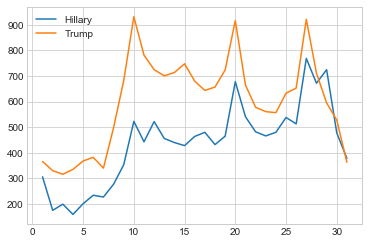

In [20]:
day_counts = pd.concat( [hillary_day_counts, trump_day_counts], axis=1)
day_counts.columns = ["Hillary", "Trump"]
day_counts.plot()


The above indicates there is a significantly increase at end, maybe because of the Debates and the final days of campaign. People are more like discussing about Trump everyday in Nov.

Trump have more social media 'likes' than Hillary, also Trump have more likes than Hillary and more activity.

# poll - Input CSV file

In [10]:
county_facts = pd.read_csv('./2016-us-election/county_facts.csv')
county_facts_dictionary = pd.read_csv('./2016-us-election/county_facts_dictionary.csv')
primary_results = pd.read_csv('./2016-us-election/primary_results.csv')
url = "http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv"

In [23]:
print (primary_results.head())

     state state_abbreviation   county    fips     party        candidate  \
0  Alabama                 AL  Autauga  1001.0  Democrat   Bernie Sanders   
1  Alabama                 AL  Autauga  1001.0  Democrat  Hillary Clinton   
2  Alabama                 AL  Baldwin  1003.0  Democrat   Bernie Sanders   
3  Alabama                 AL  Baldwin  1003.0  Democrat  Hillary Clinton   
4  Alabama                 AL  Barbour  1005.0  Democrat   Bernie Sanders   

   votes  fraction_votes  
0    544           0.182  
1   2387           0.800  
2   2694           0.329  
3   5290           0.647  
4    222           0.078  


In [24]:
source = rq.get(url).text

poll_data = StringIO(source)

In [25]:
poll_df = pd.read_csv(poll_data)

In [26]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


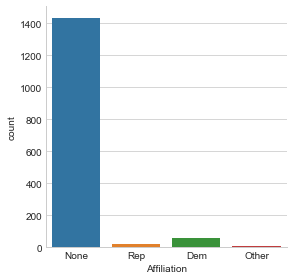

In [27]:
sns.factorplot('Affiliation',data=poll_df,kind='count')


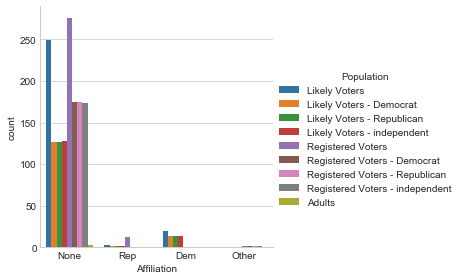

In [28]:
sns.factorplot('Affiliation',data=poll_df,hue='Population',kind='count')

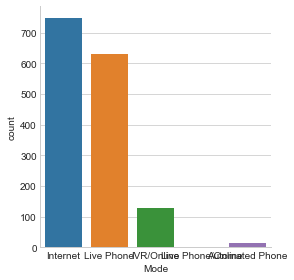

In [29]:
sns.factorplot('Mode',data=poll_df,kind='count')

Did the poll results favor Clinton or Trump?

In [30]:
avg = pd.DataFrame(poll_df.mean())
avg.drop(['Number of Observations','Question Iteration'],axis=0,inplace=True)

std = pd.DataFrame(poll_df.std())
std.drop(['Number of Observations','Question Iteration'],axis=0,inplace=True)


poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns = ['Average','Stdev']
poll_avg

,Average,Stdev
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118


The race seems to be really close, with results in favour of Clinton with a higher standard deviation than for Trump.


In [31]:
poll_df['Difference'] = (poll_df.Clinton - poll_df.Trump)/100

poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,-0.02


In [32]:
poll_df.tail(30)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
1492,Quinnipiac,2015-07-23,2015-07-28,2015-08-03T00:50:33Z,NaN,Registered Voters - independent,Live Phone,35.0,45.0,7.0,13.0,http://elections.huffingtonpost.com/pollster/p...,http://www.quinnipiac.edu/news-and-events/quin...,Nonpartisan,None,NaN,1,0.10
1493,McClatchy/Marist,2015-07-22,2015-07-28,2015-08-04T00:16:54Z,964.0,Registered Voters,Live Phone,38.0,54.0,NaN,8.0,http://elections.huffingtonpost.com/pollster/p...,http://maristpoll.marist.edu/wp-content/misc/u...,Nonpartisan,None,NaN,1,0.16
1494,McClatchy/Marist,2015-07-22,2015-07-28,2015-08-04T00:16:54Z,NaN,Registered Voters - Democrat,Live Phone,5.0,92.0,NaN,3.0,http://elections.huffingtonpost.com/pollster/p...,http://maristpoll.marist.edu/wp-content/misc/u...,Nonpartisan,None,NaN,1,0.87
1495,McClatchy/Marist,2015-07-22,2015-07-28,2015-08-04T00:16:54Z,NaN,Registered Voters - Republican,Live Phone,74.0,20.0,NaN,6.0,http://elections.huffingtonpost.com/pollster/p...,http://maristpoll.marist.edu/wp-content/misc/u...,Nonpartisan,None,NaN,1,-0.54
1496,McClatchy/Marist,2015-07-22,2015-07-28,2015-08-04T00:16:54Z,NaN,Registered Voters - independent,Live Phone,41.0,48.0,NaN,11.0,http://elections.huffingtonpost.com/pollster/p...,http://maristpoll.marist.edu/wp-content/misc/u...,Nonpartisan,None,NaN,1,0.07
1497,CNN,2015-07-22,2015-07-25,2015-07-27T22:01:00Z,898.0,Registered Voters,Live Phone,40.0,56.0,4.0,0.0,http://elections.huffingtonpost.com/pollster/p...,http://www.cnn.com/2015/07/26/politics/cnn-orc...,Nonpartisan,None,NaN,1,0.16
1498,CNN,2015-07-22,2015-07-25,2015-07-27T22:01:00Z,NaN,Registered Voters - Democrat,Live Phone,10.0,89.0,2.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.cnn.com/2015/07/26/politics/cnn-orc...,Nonpartisan,None,NaN,1,0.79
1499,CNN,2015-07-22,2015-07-25,2015-07-27T22:01:00Z,NaN,Registered Voters - Republican,Live Phone,72.0,24.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.cnn.com/2015/07/26/politics/cnn-orc...,Nonpartisan,None,NaN,1,-0.48
1500,CNN,2015-07-22,2015-07-25,2015-07-27T22:01:00Z,NaN,Registered Voters - independent,Live Phone,40.0,54.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.cnn.com/2015/07/26/politics/cnn-orc...,Nonpartisan,None,NaN,1,0.14
1501,PPP (D),2015-07-20,2015-07-21,2015-07-23T17:55:26Z,1087.0,Likely Voters,IVR/Online,37.0,50.0,NaN,13.0,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2015/PP...,Pollster,Dem,NaN,1,0.13


In [64]:
poll_df.corr()['Trump'].sort_values(ascending=False)[1:]

Undecided                 0.030041
Number of Observations    0.003430
Question Iteration       -0.051198
Other                    -0.080906
Clinton                  -0.918489
Difference               -0.977909
const                          NaN
Name: Trump, dtype: float64

In [63]:
poll_df.corr()['Clinton'].sort_values(ascending=False)[1:]

Difference                0.980859
Number of Observations    0.036823
Question Iteration       -0.072198
Other                    -0.200328
Undecided                -0.271885
Trump                    -0.918489
const                          NaN
Name: Clinton, dtype: float64

In [65]:
poll_df.corr()['Other'].sort_values(ascending=False)[1:]

Undecided                 0.426359
Number of Observations   -0.046247
Difference               -0.065959
Trump                    -0.080906
Question Iteration       -0.092517
Clinton                  -0.200328
const                          NaN
Name: Other, dtype: float64

In [66]:
poll_df.corr()['Undecided'].sort_values(ascending=False)[1:]

Other                     0.426359
Trump                     0.030041
Question Iteration       -0.062080
Number of Observations   -0.104781
Difference               -0.158444
Clinton                  -0.271885
const                          NaN
Name: Undecided, dtype: float64

# Scatterplots

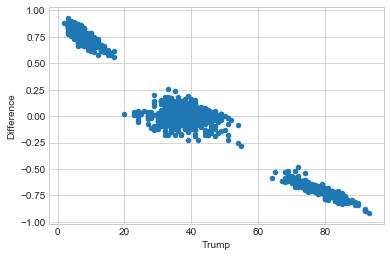

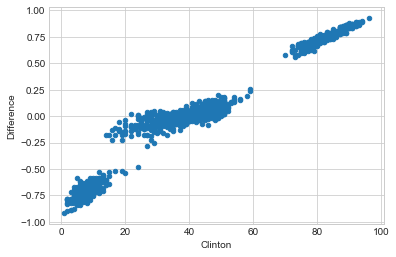

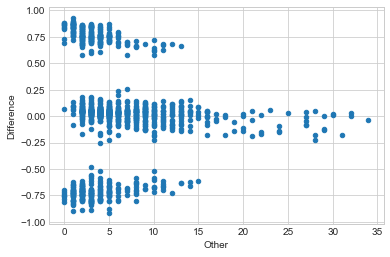

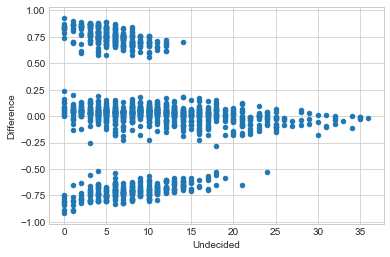

In [40]:
_ = poll_df.plot.scatter('Trump', 'Difference')
_ = poll_df.plot.scatter('Clinton', 'Difference')
_ = poll_df.plot.scatter('Other', 'Difference')
_ = poll_df.plot.scatter('Undecided', 'Difference')


# linear regression

In [49]:
beta, alpha = np.polyfit(poll_df.Trump, poll_df.Difference, 1)
print('beta: %0.3f, alpha: %0.1f.' % (beta, alpha))
print()

beta: -0.020, alpha: 0.8.



In [52]:
beta, alpha = np.polyfit(poll_df.Clinton, poll_df.Difference, 1)
print('beta: %0.3f, alpha: %0.1f.' % (beta, alpha))
print()

beta: 0.019, alpha: -0.8.



In [53]:
beta, alpha = np.polyfit(poll_df.Other, poll_df.Difference, 1)
print('beta: %0.3f, alpha: %0.1f.' % (beta, alpha))
print()

beta: nan, alpha: nan.



In [54]:
beta, alpha = np.polyfit(poll_df.Undecided, poll_df.Difference, 1)
print('beta: %0.3f, alpha: %0.1f.' % (beta, alpha))
print()

beta: nan, alpha: nan.



# Using difference to get poll result

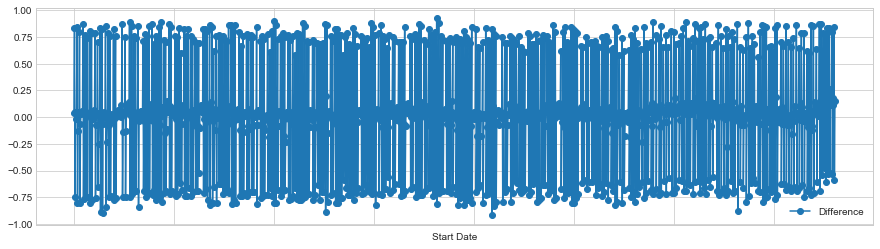

In [33]:
poll_df.plot('Start Date','Difference',figsize=(15,4),marker='o',linestyle='-')

The difference is Clinton - Trump. So a positive difference indicates a Clinton lead, and a negative difference indicates a Trump lead.
The visualisation indicates that Clinton has a slight lead in the polls, on average.

# In Network, Trump had a distinct advantage,people more like to discuss Trump on internet, so trump enjoy high popularity, but Clinton had a distinct advantage in Poll all time.